<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/wilmanski/Regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import absolute
from matplotlib import pyplot
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [10]:
housing = fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [11]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [18]:
print(df['MedInc'])

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64


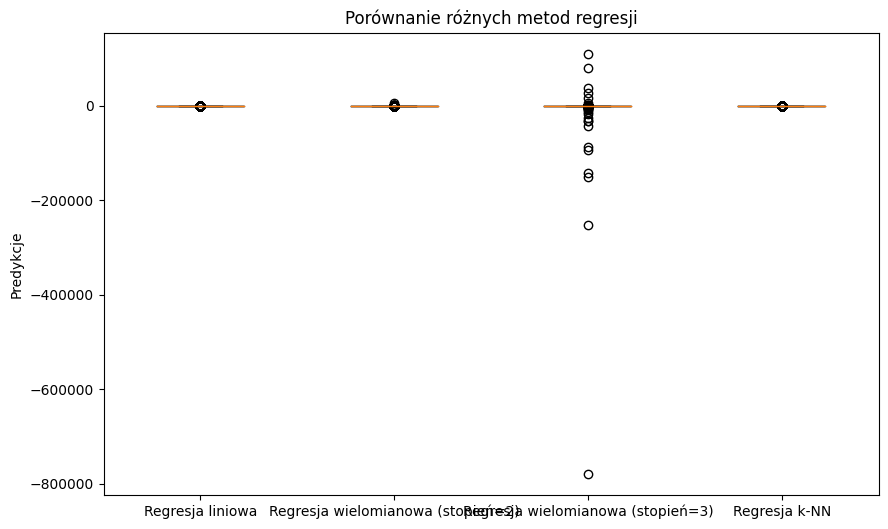

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

# Przekształcanie danych wejściowych do DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
target = pd.Series(housing.target)

# Tworzenie cechy docelowej i cech wyjaśniających
X = df.values
y = target.values

# Inicjowanie walidatora krzyżowego
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Tworzenie obiektów wielomianowych cech stopnia 2 i 3
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

# Puste listy do przechowywania predykcji
predictions_linear = []
predictions_poly2 = []
predictions_poly3 = []
predictions_knn = []

# Pętla walidacji krzyżowej
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Tworzenie i trenowanie modelu regresji liniowej
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)

    # Predykcja dla regresji liniowej
    y_pred_linear = model_linear.predict(X_test)
    predictions_linear.extend(y_pred_linear)

    # Przekształcanie danych wejściowych dla regresji wielomianowej stopnia 2
    X_train_poly2 = poly_features_2.fit_transform(X_train)
    X_test_poly2 = poly_features_2.transform(X_test)

    # Przekształcanie danych wejściowych dla regresji wielomianowej stopnia 3
    X_train_poly3 = poly_features_3.fit_transform(X_train)
    X_test_poly3 = poly_features_3.transform(X_test)

    # Tworzenie i trenowanie modelu regresji wielomianowej stopnia 2
    model_poly2 = LinearRegression()
    model_poly2.fit(X_train_poly2, y_train)

    # Predykcja dla regresji wielomianowej stopnia 2
    y_pred_poly2 = model_poly2.predict(X_test_poly2)
    predictions_poly2.extend(y_pred_poly2)

    # Tworzenie i trenowanie modelu regresji wielomianowej stopnia 3
    model_poly3 = LinearRegression()
    model_poly3.fit(X_train_poly3, y_train)

    # Predykcja dla regresji wielomianowej stopnia 3
    y_pred_poly3 = model_poly3.predict(X_test_poly3)
    predictions_poly3.extend(y_pred_poly3)

    # Tworzenie i trenowanie modelu k-NN
    model_knn = KNeighborsRegressor(n_neighbors=5)  # Ustawienie liczby sąsiadów
    model_knn.fit(X_train_poly2, y_train)  # Używamy wielomianowych cech stopnia 2 dla k-NN

    # Predykcja dla k-NN
    y_pred_knn = model_knn.predict(X_test_poly2)
    predictions_knn.extend(y_pred_knn)

# Wykres boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([predictions_linear, predictions_poly2, predictions_poly3, predictions_knn], labels=['Regresja liniowa', 'Regresja wielomianowa (stopień=2)', 'Regresja wielomianowa (stopień=3)', 'Regresja k-NN'])
plt.title('Porównanie różnych metod regresji')
plt.ylabel('Predykcje')
plt.show()